# Occupation Detection

First of all we need to describe what is the purpose of this project and what it should do. In this simple project I want to use NLP to train a model on a resume dataset and their job title to predict the occupation of anyone with its resume with this model.

Dataset: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset

In [176]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")
print(path)

/kaggle/input/resume-dataset


In [177]:
!ls -ltrh /kaggle/input/resume-dataset

total 0
drwxr-sr-x 3 1000 1000 0 May 11 07:33 data
drwxr-sr-x 2 1000 1000 0 May 11 07:33 Resume


In [178]:
!ls -ltrh /kaggle/input/resume-dataset/data/data

total 0
drwxr-sr-x 2 1000 1000 0 May 11 07:33 BUSINESS-DEVELOPMENT
drwxr-sr-x 2 1000 1000 0 May 11 07:33 AGRICULTURE
drwxr-sr-x 2 1000 1000 0 May 11 07:33 ADVOCATE
drwxr-sr-x 2 1000 1000 0 May 11 07:33 AUTOMOBILE
drwxr-sr-x 2 1000 1000 0 May 11 07:33 APPAREL
drwxr-sr-x 2 1000 1000 0 May 11 07:33 ARTS
drwxr-sr-x 2 1000 1000 0 May 11 07:33 ACCOUNTANT
drwxr-sr-x 2 1000 1000 0 May 11 07:33 BPO
drwxr-sr-x 2 1000 1000 0 May 11 07:33 CHEF
drwxr-sr-x 2 1000 1000 0 May 11 07:33 AVIATION
drwxr-sr-x 2 1000 1000 0 May 11 07:33 BANKING
drwxr-sr-x 2 1000 1000 0 May 11 07:33 CONSTRUCTION
drwxr-sr-x 2 1000 1000 0 May 11 07:33 CONSULTANT
drwxr-sr-x 2 1000 1000 0 May 11 07:33 DIGITAL-MEDIA
drwxr-sr-x 2 1000 1000 0 May 11 07:33 DESIGNER
drwxr-sr-x 2 1000 1000 0 May 11 07:33 FINANCE
drwxr-sr-x 2 1000 1000 0 May 11 07:33 HEALTHCARE
drwxr-sr-x 2 1000 1000 0 May 11 07:33 ENGINEERING
drwxr-sr-x 2 1000 1000 0 May 11 07:33 HR
drwxr-sr-x 2 1000 1000 0 May 11 07:33 INFORMATION-TECHNOLOGY
drwxr-sr-x 2 1000 1000 0 

In [179]:
!ls -ltrh /kaggle/input/resume-dataset/Resume

total 54M
-rw-r--r-- 1 1000 1000 54M May 11 07:33 Resume.csv


In [180]:
!wc /kaggle/input/resume-dataset/Resume/Resume.csv

   66016  5734748 56273235 /kaggle/input/resume-dataset/Resume/Resume.csv


In [181]:
import numpy as np
import pandas as pd

In [182]:
df = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv", encoding="utf-8")

In [183]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [184]:
df.shape

(2484, 4)

In [185]:
df["Category"].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

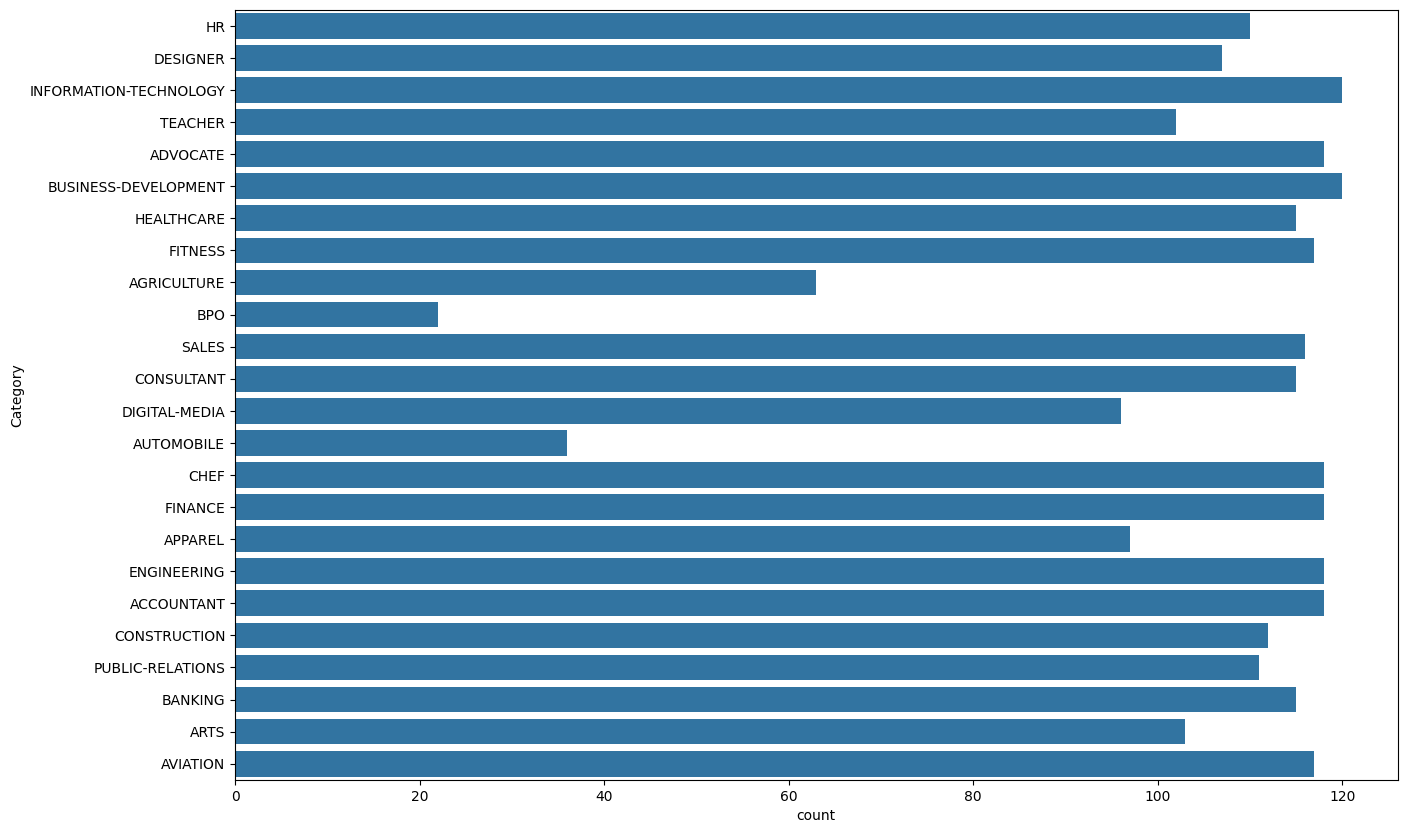

In [187]:
plt.figure(figsize=(15,10))
sns.countplot(df["Category"]);

In [188]:
df["Category"].unique().shape

(24,)

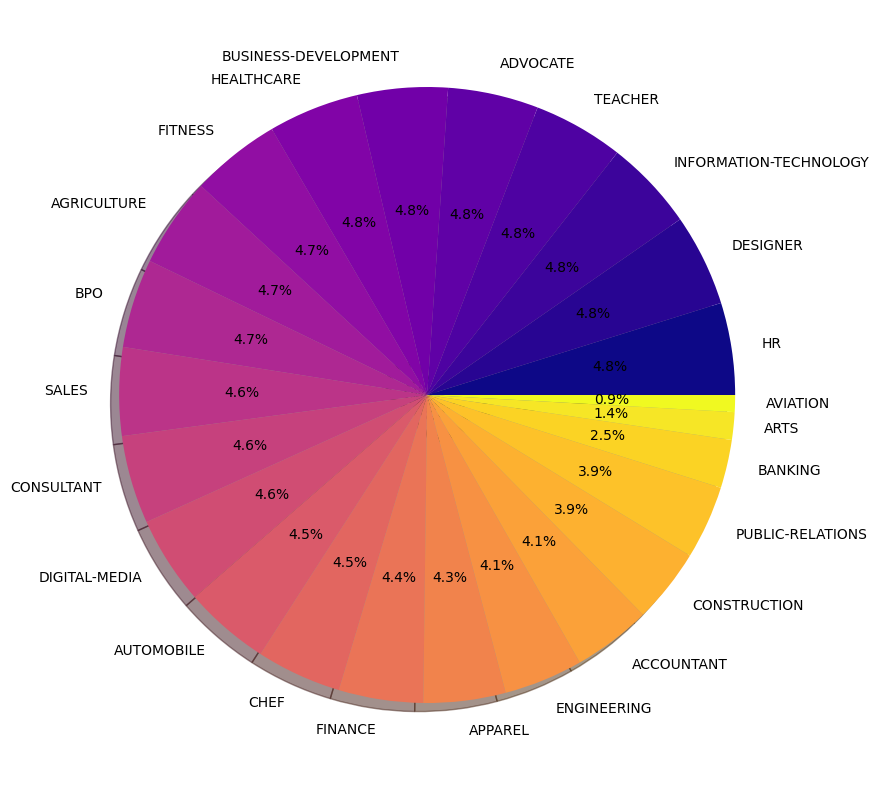

In [189]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,counts.shape[0])));

In [190]:
print(df["Resume_str"][0])

         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss preve

In [191]:
max_size = df['Category'].value_counts().max()

## Oversampling

In [192]:
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

<ipython-input-192-7243bcb6ca07>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


# -

In [193]:
df = balanced_df.sample(frac=1).reset_index(drop=True)

In [194]:
df['Category'].value_counts()

,count
Category,
CONSULTANT,120
DESIGNER,120
AGRICULTURE,120
ARTS,120
PUBLIC-RELATIONS,120
CONSTRUCTION,120
FINANCE,120
BANKING,120
BPO,120


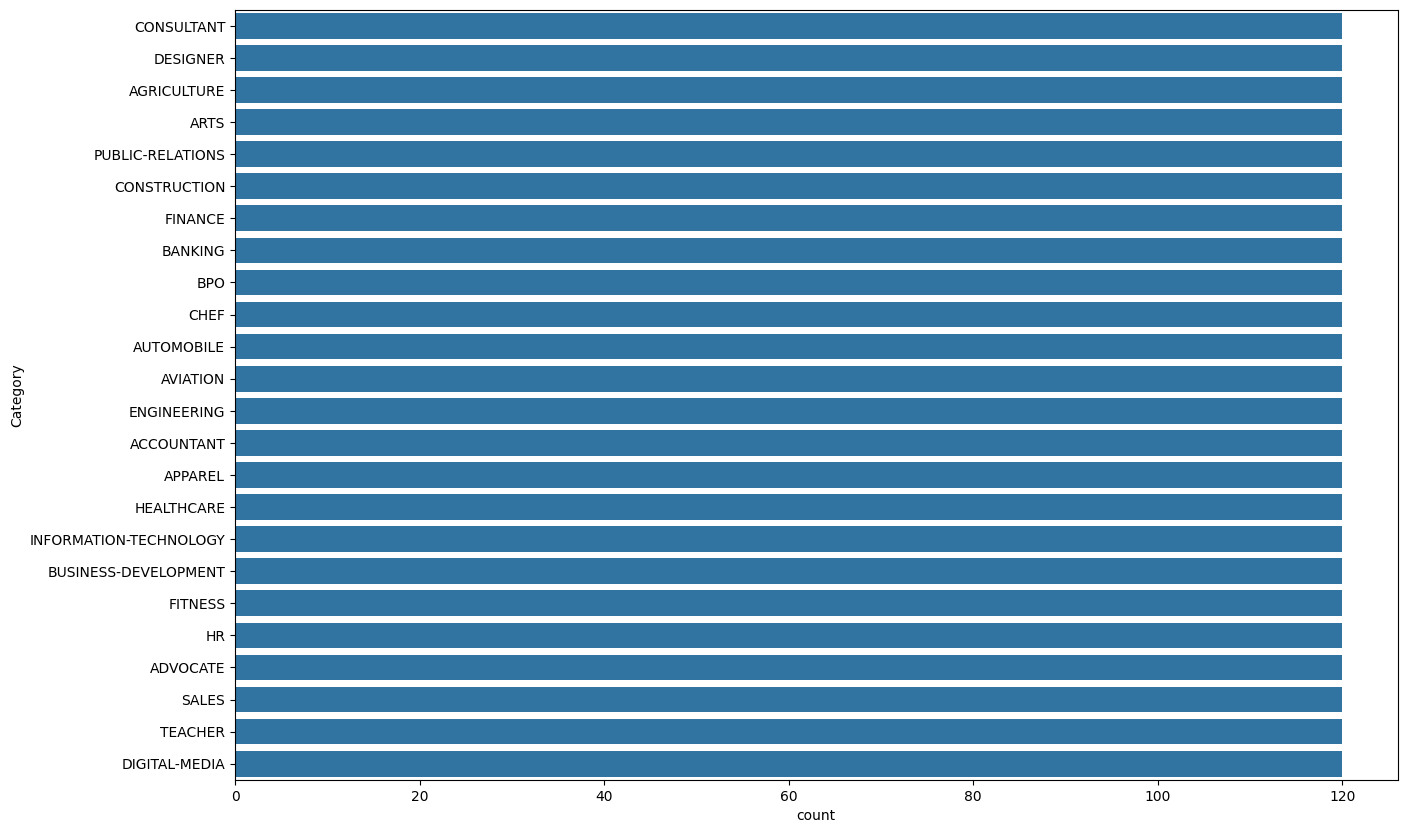

In [195]:
plt.figure(figsize=(15,10))
sns.countplot(df["Category"]);

In [196]:
import re
def cleanResume(txt):
    cleanText = re.sub("http\S+\s", " ", txt)
    cleanText = re.sub("RT|cc", " ", cleanText)
    cleanText = re.sub("#\S+\s", " ", cleanText)
    cleanText = re.sub("@\S+", "  ", cleanText)
    cleanText = re.sub("[%s]" % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), " ", cleanText)
    cleanText = re.sub(r"[^\x00-\x7f]", " ", cleanText)
    cleanText = re.sub("\s+", " ", cleanText)
    return cleanText

In [197]:
cleanResume("me %%%%## and her are @gmail.com /  // /// work global company")

'me and her are work global company'

In [198]:
df["Resume"] = df["Resume_str"].apply(lambda x: cleanResume(x))

In [199]:
print(df["Resume"][0])
print("-------------")
print(df["Resume_str"][0])

 CONSULTANT Professional Profile Highly motivated and self driven Systems Analyst with vast experience in various environments and technologies in support of multiple departments across the enterprise Expertise in Software Development Lifecycle SDLC and Computer Systems Validation CSV Looking for an opportunity to apply and develop strong analytical skills and problem solving techniques Qualifications Documentum DCM and Documentum D2 MS A ess VBA C C some HTML Assembly language programming Project leadership strong technical skills analytical skills problem solving skills organizational skills and communication skills Systems analyst general application support software development data communications System administration Expertise in SDLC on small to large projects Proficient in SDLC and Computer Systems Validation Requirements and Documentation Experience Consultant January 1999 to November 2015 Company Name City State Provides consultant expertise in various roles supporting McNeil

In [200]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [201]:
label_encoder.fit(df["Category"])
df["Category"] = label_encoder.transform(df["Category"])

In [202]:
df["Category"]

,Category
0,12
1,13
2,2
3,2
4,4
...,...
2875,11
2876,1
2877,18
2878,7


In [203]:
df.Category.unique()

array([12, 13,  2,  4, 21, 11, 16,  7,  8, 10,  5,  6, 15,  0,  3, 18, 20,
        9, 17, 19,  1, 22, 23, 14])

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

tfidf.fit(df["Resume"])
requredTaxt  = tfidf.transform(df["Resume"])

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df["Category"], test_size=0.2, random_state=42)

In [207]:
print(X_train.shape, X_test.shape)

(2304, 33158) (576, 33158)


In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Train KNeighborsClassifier

In [209]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [210]:
accuracy_score(y_test, y_pred_knn)

0.578125

In [211]:
confusion_matrix(y_test, y_pred_knn)

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
         5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,
         0,  1,  5,  1,  0,  1,  1,  1],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0, 15,  0,  0,  1,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  2,  0,  1,  0,  0,  9,  0,  0,  0,  1,  0,  0,
         0,  0,  1,  0,  0,  0,  3,  6],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  2,  9,  0,  0, 14,  0,  0,  0,  1,  0,  1,
         3,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  1, 10,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

In [212]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        23
           1       0.78      0.27      0.40        26
           2       1.00      0.53      0.69        19
           3       1.00      0.28      0.43        29
           4       0.67      0.09      0.15        23
           5       0.83      0.71      0.77        28
           6       0.90      0.28      0.43        32
           7       0.92      0.46      0.61        24
           8       0.87      0.68      0.76        19
           9       0.15      0.93      0.26        27
          10       0.87      0.72      0.79        18
          11       0.89      0.89      0.89        28
          12       0.36      0.19      0.25        26
          13       0.67      0.70      0.68        23
          14       0.90      0.70      0.79        27
          15       0.74      0.61      0.67        23
          16       0.48      0.48      0.48        21
          17       0.67    

# 2. Train RandomForestClassifier

In [213]:
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [214]:
accuracy_score(y_test, y_pred_rf)

0.8628472222222222

In [215]:
confusion_matrix(y_test, y_pred_rf)

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  1],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  1],
       [ 0,  2,  0, 22,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 14,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  1,  0,  1,  1,  3],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

In [217]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       0.78      0.81      0.79        26
           2       0.89      0.89      0.89        19
           3       0.92      0.76      0.83        29
           4       0.93      0.61      0.74        23
           5       1.00      0.89      0.94        28
           6       0.91      0.94      0.92        32
           7       0.91      0.88      0.89        24
           8       0.90      1.00      0.95        19
           9       0.91      0.78      0.84        27
          10       0.81      0.94      0.87        18
          11       0.90      0.96      0.93        28
          12       0.87      0.50      0.63        26
          13       0.91      0.91      0.91        23
          14       0.96      0.89      0.92        27
          15       0.88      0.91      0.89        23
          16       0.83      0.90      0.86        21
          17       0.73    

# 3. Train SVC

In [219]:
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [220]:
accuracy_score(y_test, y_pred_svc)

0.8784722222222222

In [221]:
confusion_matrix(y_test, y_pred_svc)

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  1,  0,  0,  1,  1],
       [ 0,  0, 16,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0, 22,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  1,  0,  2,  0],
       [ 0,  1,  0,  0, 17,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

In [222]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       0.85      0.65      0.74        26
           2       0.94      0.84      0.89        19
           3       0.92      0.76      0.83        29
           4       0.89      0.74      0.81        23
           5       1.00      0.89      0.94        28
           6       0.91      0.94      0.92        32
           7       0.88      0.88      0.88        24
           8       1.00      1.00      1.00        19
           9       0.96      0.85      0.90        27
          10       0.94      0.94      0.94        18
          11       0.93      1.00      0.97        28
          12       1.00      0.62      0.76        26
          13       0.88      0.96      0.92        23
          14       0.93      0.93      0.93        27
          15       0.88      1.00      0.94        23
          16       0.86      0.90      0.88        21
          17       0.76    

In [ ]:
# import pickle
# pickle.dump(tfidf,open("tfidf.pkl","wb"))
# pickle.dump(svc_model, open("clf.pkl", "wb"))
# pickle.dump(label_encoder, open("encoder.pkl","wb"))

In [224]:
def prediction(input_resume):
    cleaned_text = cleanResume(input_resume)

    vectorized_text = tfidf.transform([cleaned_text])

    vectorized_text = vectorized_text.toarray()

    predicted_category = svc_model.predict(vectorized_text)

    predicted_category_name = label_encoder.inverse_transform(predicted_category)

    return predicted_category_name[0]

In [225]:
resume = """
Johnathan R. Blake
Email: john.blake.tech@example.com | Phone: (312) 555-8437
Location: Chicago, IL | LinkedIn: linkedin.com/in/johnrblake | GitHub: github.com/jrblakedev


---

Professional Summary
Results-driven IT professional with 7+ years of experience in systems administration, cloud infrastructure, and cybersecurity. Skilled in implementing scalable IT solutions, maintaining secure network environments, and automating workflows using DevOps tools. Strong communicator with a track record of improving system uptime and operational efficiency.


---

Skills

Operating Systems: Windows Server, Linux (Ubuntu, CentOS)

Cloud Platforms: AWS, Azure, Google Cloud

DevOps Tools: Docker, Kubernetes, Jenkins, Ansible

Security: Firewalls, SIEM, Penetration Testing, Endpoint Protection

Programming/Scripting: Python, Bash, PowerShell

Databases: MySQL, PostgreSQL, MongoDB

Tools: Git, Jira, Splunk, Nagios, Terraform



---

Work Experience

Senior Systems Administrator
SkyForge Technologies | Chicago, IL
July 2021 – Present

Managed and secured hybrid cloud infrastructure (AWS & on-prem) for a financial services client with 99.98% uptime.

Automated server provisioning using Ansible and Terraform, reducing manual workload by 60%.

Led migration of legacy systems to containerized Docker environments with Kubernetes orchestration.


IT Infrastructure Engineer
BlueNet Solutions | Naperville, IL
March 2018 – June 2021

Deployed and maintained company-wide VPN and network security systems for remote work scalability.

Designed backup and disaster recovery strategies using AWS S3 and Glacier.

Supported 100+ end-users and resolved L2/L3 tickets with 95% satisfaction rating.


IT Support Specialist
QuickLogic Corp. | Evanston, IL
August 2016 – February 2018

Installed, configured, and troubleshot Windows and Linux-based systems.

Provided support for Office 365, Active Directory, and endpoint protection systems.

Wrote internal documentation and SOPs for onboarding and troubleshooting procedures.



---

Education
B.S. in Information Technology
Illinois State University | Normal, IL
Graduated: May 2016


---

Certifications

AWS Certified Solutions Architect – Associate

CompTIA Security+

Cisco Certified Network Associate (CCNA)



---

Projects

Cloud Cost Optimizer Tool: Python script integrated with AWS SDK to analyze unused resources and cut cloud costs by 23%.

Home Lab Setup: Self-hosted Kubernetes cluster for experimenting with CI/CD pipelines and monitoring solutions.

"""

In [226]:
prediction(resume)

'INFORMATION-TECHNOLOGY'